In [44]:
import pandas as pd
import numpy as np
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor, LongTensor, FloatTensor
from torch.autograd import Variable

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

from sklearn.linear_model import LinearRegression
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("data/full_data.pkl")
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000,0.000000,None
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000,0.000000,None
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000,0.000000,None
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000,0.000000,None
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000,0.000000,None
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000,0.000000,None
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000,0.000000,None
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000,1.000000,None
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000,1.000000,None
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000,1.000000,None


This is the data that was gathered and computed by the first notebook.

In order to be able to compute the training of our models we only take the last 2 millions clicks and filter all users with less than 5 clicks in it. This is considered sufficient to yield relevant results.

In [3]:
df_end = df.tail(int(2e6)).copy()

In [4]:
active_set = df_end[df_end.groupby('user').user.transform('size') > 4].copy()

The features are all the relevant features found in the previous part, namely :
- the mean local agreement of the user before this click,
- the previous agreement on the tile the user will click next,
- the number of collaborators (distinct users who clicked on tiles surrounding the ones the current user clicked) divided by the number of clicks,
- the average time between clicks for the user so far,
- the median distance between those same clicks,
- the number of clicks before this one.
For each user, they are computed for each click starting from the third one. (each user has at least 5 clicks due to the filtering)

The target is always the local agreement of the next click.

In [5]:
def extract_feat_and_target(activity):
    acc = []
    for i in np.arange(2,activity.shape[0]):
        acc.append([ activity.iloc[:i].local_agreement.mean(), \
                            activity.iloc[i].previous_agreement, \
                            activity.iloc[:i].previous_user.nunique() / i, \
                            (activity.iloc[i-1].ts-activity.iloc[0].ts) / i, \
                            np.nanmedian(np.sqrt(np.square(activity.iloc[:i][["x_coordinate","y_coordinate"]].diff()[1:]).sum(axis=1))), \
                            i, \
                            activity.iloc[i].local_agreement
                        ])
    return pd.DataFrame(acc, columns=["avg_local","previous_on_next_tile","avg_nb_collab","avg_time_between","median_distance","nb_clicks","target"])

In [6]:
features_and_target = active_set.groupby("user").progress_apply(extract_feat_and_target)

100%|██████████| 101811/101811 [1:21:14<00:00, 20.89it/s] 


In [7]:
features_and_target

avg_local  previous_on_next_tile  \
user                                                                
+++/DjiwyzTQzfai1RGavwwdeF0= 0    0.625000               0.555556   
                             1    0.750000               0.000000   
                             2    0.718750               0.555556   
                             3    0.775000               0.666667   
                             4    0.812500               0.000000   
                             5    0.714286               0.500000   
                             6    0.750000               0.888889   
                             7    0.777778               0.111111   
                             8    0.762500               0.444444   
                             9    0.772727               0.222222   
                             10   0.770833               0.666667   
                             11   0.778846               0.777778   
                             12   0.785714               0.000000   
                             13   0.783333               0.000000   
                             14   0.781250               0.666667   
                             15   0.786765               0.333333   
                             16   0.798611               0.444444   
                             17   0.802632               0.666667   
                             18   0.812500               0.555556   
                             19   0.821429               0.111111   
++2sA4EI7im8sARsTnyul95caJc= 0    0.500000               0.222222   
                             1    0.500000               0.000000   
                             2    0.500000               0.000000   
                             3    0.450000               0.000000   
                             4    0.458333               1.000000   
                             5    0.392857               0.111111   
                             6    0.406250               0.000000   
                             7    0.388889               0.000000   
                             8    0.375000               0.000000   
                             9    0.363636               0.222222   
...                                    ...                    ...   
zztQmD6PgYW7BynvwY3ohxOyAtA= 23   0.350000               0.000000   
                             24   0.350962               0.111111   
                             25   0.356481               0.111111   
                             26   0.357143               0.000000   
                             27   0.379310               0.000000   
                             28   0.379167               0.000000   
                             29   0.366935               0.000000   
zzvnd84RlDPEdtpcphJIA0Dxopg= 0    0.687500               0.000000   
                             1    0.666667               0.555556   
                             2    0.718750               0.111111   
                             3    0.775000               0.222222   
zzyRy/jIix0JW68dAvG2AVFdYtU= 0    0.812500               0.000000   
                             1    0.750000               0.000000   
                             2    0.593750               0.000000   
                             3    0.475000               0.111111   
                             4    0.437500               0.000000   
                             5    0.428571               0.000000   
                             6    0.390625               0.000000   
                             7    0.430556               0.000000   
                             8    0.387500               0.000000   
                             9    0.363636               0.000000   
                             10   0.333333               0.000000   
                             11   0.317308               0.000000   
                             12   0.294643               0.000000   
                             13   0.283333               0.000000   
                             14

In [8]:
features_and_target.to_pickle("data/active_set_features_last_2_mil.pkl")

This set is divided between the test set (all the last clicks), the validation set (the second to last clicks) and the train set (everything else).

In [9]:
cumcount = features_and_target.groupby('user').cumcount(ascending=False)
train_set = features_and_target[cumcount > 1].copy()
validation_set = features_and_target[cumcount == 1].copy()
test_set = features_and_target[cumcount == 0].copy()

The time distance and number of clicks features are normalized.

In [11]:
# normalization
for col in ["avg_time_between","median_distance","nb_clicks"]:
    train_min = train_set[col].min()
    train_max = train_set[col].max()
    train_set[col] = (train_set[col] - train_min) / (train_max - train_min)
    test_set[col] = (test_set[col] - train_min) / (train_max - train_min)
    validation_set[col] = (validation_set[col] - train_min) / (train_max - train_min)

In [12]:
train_set.describe()

,avg_local,previous_on_next_tile,avg_nb_collab,avg_time_between,median_distance,nb_clicks,target
count,1.222331e+06,1.222331e+06,1.222331e+06,1.222331e+06,1.222331e+06,1.222331e+06,1.222331e+06
mean,4.165054e-01,1.345116e-01,9.246151e-01,4.944667e-02,4.660569e-02,9.166760e-02,4.230343e-01
std,2.127261e-01,2.365835e-01,1.377279e-01,5.048869e-02,1.012323e-01,9.934556e-02,3.209650e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.633929e-01,0.000000e+00,9.000000e-01,2.542363e-02,3.610967e-03,1.910828e-02,1.250000e-01
50%,4.027778e-01,0.000000e+00,1.000000e+00,3.283553e-02,1.052203e-02,5.732484e-02,3.750000e-01
75%,5.500000e-01,1.111111e-01,1.000000e+00,5.287967e-02,2.974210e-02,1.273885e-01,6.250000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
test_set.describe()

,avg_local,previous_on_next_tile,avg_nb_collab,avg_time_between,median_distance,nb_clicks,target
count,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000
mean,0.455240,0.171249,0.952153,0.082704,0.061884,0.082840,0.469627
std,0.205476,0.272718,0.103421,0.069372,0.114932,0.093055,0.338208
min,0.000000,0.000000,0.000000,0.003964,0.000000,0.012739,0.000000
25%,0.312500,0.000000,0.948718,0.035139,0.004957,0.025478,0.125000
50%,0.444444,0.000000,1.000000,0.057609,0.013938,0.050955,0.500000
75%,0.589286,0.222222,1.000000,0.104431,0.044451,0.101911,0.750000
max,1.000000,1.000000,1.000000,0.529375,0.906244,1.012739,1.000000


In [14]:
validation_set.describe()

,avg_local,previous_on_next_tile,avg_nb_collab,avg_time_between,median_distance,nb_clicks,target
count,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000,101811.000000
mean,0.454938,0.166401,0.953843,0.078305,0.067537,0.076471,0.462964
std,0.211813,0.268619,0.103598,0.072966,0.120743,0.093055,0.336454
min,0.000000,0.000000,0.000000,0.004799,0.000000,0.006369,0.000000
25%,0.307692,0.000000,0.958333,0.032064,0.005008,0.019108,0.125000
50%,0.443182,0.000000,1.000000,0.051894,0.014681,0.044586,0.375000
75%,0.590909,0.222222,1.000000,0.095071,0.052445,0.095541,0.750000
max,1.000000,1.000000,1.000000,0.690807,0.997501,1.006369,1.000000


# Baseline

To compare our different models we use as a baseline a model that always returns the average local agreement of the user as a prediction for his next click.

In [65]:
np.sqrt(np.square(test_set.target.values - test_set.avg_local.values).mean())

0.3143902259786052

# Linear Regression

As a first attempt with a simple but efficient model, we train a linear regressor on this dataset.

In [20]:
reg = LinearRegression()

In [22]:
reg.fit(train_set.drop("target",axis=1).as_matrix(),train_set.target.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Test rmse
np.sqrt(np.square(reg.predict(test_set.drop("target",axis=1).as_matrix()) - test_set.target).mean())

0.28742358409916924

It already performs better than the baseline.

Let's see with all the possible combinations from 1 to all 6 features.

In [25]:
features_combinations = [ list(e) for i in range(1,7) for e in combinations(range(6),i) ]
rmse = []
for features in tqdm(features_combinations):
    reg = LinearRegression()
    reg.fit(train_set[train_set.columns[features]].as_matrix(),train_set.target.values)
    rmse.append(np.sqrt(np.square(reg.predict(test_set[test_set.columns[features]].as_matrix()) - test_set.target).mean()))

100%|██████████| 63/63 [00:08<00:00,  7.09it/s]


In [26]:
best_features = features_combinations[np.argmin(rmse)]
best_features

[0, 1, 2, 3, 4, 5]

In [27]:
np.min(rmse)

0.28742358409916924

The features were well designed because the regression with all the features ends up performing the best.

In [28]:
reg.coef_

array([ 0.62959503,  0.3440358 , -0.02233216,  0.062347  , -0.01888635,
        0.03193831])

Its coefficients show that the two first features (average local agreement so far and previous agreement on the next tile) weight for almost 90% of the decision. Even if the other coefficients are small, they seem to agree with intuition : the average number of collaborators and the median distance are negatively weighted, which means the more you cross path with different people and the more distance there is between your clicks, the less you agree with your environment. On the other hand, the more time there is between your clicks and the more you clicked, the more you agree with your environment.

# Neural Network

To see if there is some non-linear relation between those features and the local agreement, we train a basic neural network, with only one hidden layer of size 12 and a sigmoid activation function. We train it by minimizing a MSE loss function with a batch Stochastic Gradient Descent optimizer. Its hyper parameters, such as the learning rate and the size of the mini-batches, were learned through grid search.

In [29]:
train_input = Variable(FloatTensor(train_set[train_set.columns[best_features]].values))
validation_input = Variable(FloatTensor(validation_set[validation_set.columns[[best_features]]].values))
test_input = Variable(FloatTensor(test_set[test_set.columns[[best_features]]].values))

In [30]:
train_target = Variable(FloatTensor(train_set.target.values))
validation_target = Variable(FloatTensor(validation_set.target.values))
test_target = Variable(FloatTensor(test_set.target.values))

In [77]:
def train_model(model, nb_epochs = 50, learning_rate = 0.5, mini_batch_size = 64, opt = optim.SGD):
    criterion = nn.MSELoss()
    optimizer = opt(model.parameters(), lr = learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    
    best_error = validation_input.size(0)+1
    res = []
    
    for e in tqdm_notebook(range(nb_epochs)):
        sum_loss = 0
        
        for b in tqdm_notebook(range(0, train_input.size(0), mini_batch_size)):
            if (b+mini_batch_size) > train_input.size(0):
                output = model(train_input[b:])
                loss = criterion(output, train_target[b:])
            else:
                output = model(train_input.narrow(0, b, mini_batch_size))
                loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            
            sum_loss = sum_loss + loss.data[0]
            model.zero_grad()
            loss.backward()
            optimizer.step()

        train_error = np.sqrt((model(train_input).squeeze() - train_target).data.pow(2).mean())
        validation_error = np.sqrt((model(validation_input).squeeze() - validation_target).data.pow(2).mean())
        scheduler.step(validation_error)
        
        print("  Epoch {:>3} : loss = {:1.8f} | training error = {:>4} | validation error = {:>4}".format(e+1, sum_loss, train_error, validation_error))
        res.append(validation_error)
        
        if (validation_error < best_error) or ( (validation_error == best_error) and ((e+1) < best_epoch) ):
            best_error = validation_error
            best_epoch = e+1
            
    return [ res, best_error, best_epoch ]

### Learning rate

In [74]:
#learning_rates = [ 0.75, 0.5, 0.25, 0.1 ]
learning_rates = [ 0.1, 0.05, 0.01, 0.005, 0.001 ]

lr_results = []
for lr in tqdm_notebook(learning_rates):
    print("LEARNING RATE", lr)
    print("-"*15)
    model = nn.Sequential(nn.Linear(6,12), nn.Linear(12,1), nn.Sigmoid())
    arr = train_model(model, nb_epochs=20, mini_batch_size=64, learning_rate=lr)
    lr_results.append(arr)
    with open("models/features_nn_model_lr_"+str(lr)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

LEARNING RATE 0.1
---------------


  Epoch   1 : loss = 1445.78822118 | training error = 0.2735842644780531 | validation error = 0.28701784337138453


  Epoch   2 : loss = 1431.40584898 | training error = 0.27355657040836895 | validation error = 0.28699476187621104


  Epoch   3 : loss = 1431.10491145 | training error = 0.2735413946830359 | validation error = 0.28697892986994006


  Epoch   4 : loss = 1430.88922130 | training error = 0.27353173641163137 | validation error = 0.286967966138931


  Epoch   5 : loss = 1430.72391801 | training error = 0.27352556923531385 | validation error = 0.286960688440189


  Epoch   6 : loss = 1430.59407196 | training error = 0.2735217379857685 | validation error = 0.28695604843742256


  Epoch   7 : loss = 1430.49009847 | training error = 0.2735194907592941 | validation error = 0.28695325163556523


  Epoch   8 : loss = 1430.40536902 | training error = 0.2735183248847393 | validation error = 0.2869517429674855


  Epoch   9 : loss = 1430.33521577 | training error = 0.2735179004561348 | validation error = 0.2869511315969922


  Epoch  10 : loss = 1430.27627572 | training error = 0.27351798734702254 | validation error = 0.2869511422751701


  Epoch  11 : loss = 1430.22608302 | training error = 0.2735184284602955 | validation error = 0.28695158673883986


  Epoch  12 : loss = 1430.18281809 | training error = 0.2735191160609869 | validation error = 0.28695232978036045


  Epoch  13 : loss = 1430.14510322 | training error = 0.2735199767794534 | validation error = 0.28695327929234427


  Epoch  14 : loss = 1430.11189015 | training error = 0.27352095903470225 | validation error = 0.2869543616943953


  Epoch  15 : loss = 1430.08237192 | training error = 0.2735220271052608 | validation error = 0.2869555377917853


  Epoch  16 : loss = 1430.05592361 | training error = 0.27352315570778707 | validation error = 0.2869567688341499


  Epoch  17 : loss = 1430.03204178 | training error = 0.27352432580154673 | validation error = 0.28695804002670655


  Epoch  18 : loss = 1430.01033886 | training error = 0.2735255256935881 | validation error = 0.2869593157512943


  Epoch  19 : loss = 1429.99049106 | training error = 0.2735267441193741 | validation error = 0.28696059890992204


  Epoch  20 : loss = 1429.97224974 | training error = 0.2735279730432755 | validation error = 0.2869618812361698
LEARNING RATE 0.05
---------------


  Epoch   1 : loss = 1457.37112691 | training error = 0.2735319234833982 | validation error = 0.28697212295186786


  Epoch   2 : loss = 1430.37240578 | training error = 0.2735143282758484 | validation error = 0.2869589851521475


  Epoch   3 : loss = 1430.24489807 | training error = 0.273511198397371 | validation error = 0.2869558736908385


  Epoch   4 : loss = 1430.18062930 | training error = 0.2735103112423374 | validation error = 0.28695529886361515


  Epoch   5 : loss = 1430.13064127 | training error = 0.2735101293226819 | validation error = 0.28695534652058763


  Epoch   6 : loss = 1430.08667076 | training error = 0.27351026190305555 | validation error = 0.2869555824103116


  Epoch   7 : loss = 1430.04657525 | training error = 0.27351058013215795 | validation error = 0.2869559413871062


  Epoch   8 : loss = 1430.00961199 | training error = 0.273511024047588 | validation error = 0.28695640431465474


  Epoch   9 : loss = 1429.97539697 | training error = 0.2735115548295155 | validation error = 0.28695697830686456


  Epoch  10 : loss = 1429.94365246 | training error = 0.27351214449025946 | validation error = 0.28695764988859607


  Epoch  11 : loss = 1429.91414919 | training error = 0.2735127730897266 | validation error = 0.2869583933741471


  Epoch  12 : loss = 1429.88668480 | training error = 0.27351342153486025 | validation error = 0.2869592061286875


  Epoch  13 : loss = 1429.86108067 | training error = 0.27351407627092805 | validation error = 0.2869600698578792


  Epoch  14 : loss = 1429.83717190 | training error = 0.27351472793963627 | validation error = 0.28696096835948315


  Epoch  15 : loss = 1429.81481786 | training error = 0.27351536620481953 | validation error = 0.2869618971227278


  Epoch  16 : loss = 1429.79388808 | training error = 0.2735159847864795 | validation error = 0.28696284654867943


  Epoch  17 : loss = 1429.77427231 | training error = 0.27351658109203675 | validation error = 0.2869637958627435


  Epoch  18 : loss = 1429.75585477 | training error = 0.2735171495402234 | validation error = 0.28696475665791954


  Epoch  19 : loss = 1429.73853294 | training error = 0.27351768885524125 | validation error = 0.2869657103532175


  Epoch  20 : loss = 1429.72223583 | training error = 0.27351819831247165 | validation error = 0.28696665173215163
LEARNING RATE 0.01
---------------


  Epoch   1 : loss = 1515.31300167 | training error = 0.27388336045037404 | validation error = 0.2869440715009646


  Epoch   2 : loss = 1431.40147187 | training error = 0.2736611391964851 | validation error = 0.28703602608299733


  Epoch   3 : loss = 1430.11378916 | training error = 0.2735845389045183 | validation error = 0.28701548777482494


  Epoch   4 : loss = 1429.56105448 | training error = 0.2735487478179251 | validation error = 0.2870068688237367


  Epoch   5 : loss = 1429.30052776 | training error = 0.27353162065102843 | validation error = 0.28700687453080703


  Epoch   6 : loss = 1429.17554612 | training error = 0.2735233004568379 | validation error = 0.2870098222658209


  Epoch   7 : loss = 1429.11472022 | training error = 0.2735191956227819 | validation error = 0.28701331444390726


  Epoch   8 : loss = 1429.08459681 | training error = 0.2735171337098601 | validation error = 0.2870164762037161


  Epoch   9 : loss = 1429.06931913 | training error = 0.273516069768546 | validation error = 0.28701909315243374


  Epoch  10 : loss = 1429.06128793 | training error = 0.2735155020023335 | validation error = 0.2870211538817168


  Epoch  11 : loss = 1429.05683980 | training error = 0.27351518250930634 | validation error = 0.28702276276954436


  Epoch  12 : loss = 1429.05418481 | training error = 0.2735149931788274 | validation error = 0.28702399516864535


  Epoch  13 : loss = 1429.05246718 | training error = 0.27351487024639737 | validation error = 0.28702494934044065


  Epoch  14 : loss = 1429.05124478 | training error = 0.273514785507702 | validation error = 0.2870256997469285


  Epoch  15 : loss = 1429.05029103 | training error = 0.27351472118311565 | validation error = 0.287026290272704


  Epoch  16 : loss = 1429.04949331 | training error = 0.2735146703300864 | validation error = 0.28702676195603943


  Epoch  17 : loss = 1429.04879342 | training error = 0.27351462735733373 | validation error = 0.28702714696681425


  Epoch  18 : loss = 1429.04815891 | training error = 0.2735145889388649 | validation error = 0.28702746153002356


  Epoch  19 : loss = 1429.04755926 | training error = 0.2735145539765079 | validation error = 0.28702772846862945


  Epoch  20 : loss = 1429.04699918 | training error = 0.2735145215213818 | validation error = 0.287027958964532
LEARNING RATE 0.005
---------------


  Epoch   1 : loss = 1724.38138553 | training error = 0.28040600830976575 | validation error = 0.2921626652579098


  Epoch   2 : loss = 1453.17982636 | training error = 0.274171258652087 | validation error = 0.28705745905588687


  Epoch   3 : loss = 1433.41180034 | training error = 0.2738261131688147 | validation error = 0.2871254060414618


  Epoch   4 : loss = 1431.53513329 | training error = 0.27371717653035105 | validation error = 0.28713176080425346


  Epoch   5 : loss = 1430.64608517 | training error = 0.2736492576751024 | validation error = 0.2871060089376358


  Epoch   6 : loss = 1430.06900413 | training error = 0.2736042321549875 | validation error = 0.28708317923092547


  Epoch   7 : loss = 1429.68481845 | training error = 0.2735740939039421 | validation error = 0.287067691985062


  Epoch   8 : loss = 1429.42731237 | training error = 0.27355380180877537 | validation error = 0.2870580016565639


  Epoch   9 : loss = 1429.25383859 | training error = 0.2735400664987046 | validation error = 0.287052157644397


  Epoch  10 : loss = 1429.13641210 | training error = 0.27353072582453314 | validation error = 0.2870487822083205


  Epoch  11 : loss = 1429.05653017 | training error = 0.2735243342949998 | validation error = 0.2870469461343508


  Epoch  12 : loss = 1429.00191613 | training error = 0.2735199390953674 | validation error = 0.28704601669013075


  Epoch  13 : loss = 1428.96434154 | training error = 0.2735168952749789 | validation error = 0.2870456383210164


  Epoch  14 : loss = 1428.93834314 | training error = 0.2735147727684455 | validation error = 0.2870455495453926


  Epoch  15 : loss = 1428.92019892 | training error = 0.27351327884827414 | validation error = 0.28704561816236607


  Epoch  16 : loss = 1428.90742964 | training error = 0.27351221704430634 | validation error = 0.2870457495435669


  Epoch  17 : loss = 1428.89834565 | training error = 0.2735114541839929 | validation error = 0.28704589398564795


  Epoch  18 : loss = 1428.89180668 | training error = 0.27351089935450046 | validation error = 0.2870460177680487


  Epoch  19 : loss = 1428.88704409 | training error = 0.27351049066312566 | validation error = 0.2870460989850284


  Epoch  20 : loss = 1428.88351821 | training error = 0.2735101873481206 | validation error = 0.28704616949392703
LEARNING RATE 0.001
---------------


  Epoch   1 : loss = 1911.08546651 | training error = 0.31202025463894123 | validation error = 0.32555770886839597


  Epoch   2 : loss = 1809.14848607 | training error = 0.30332583249759104 | validation error = 0.3155942228951137


  Epoch   3 : loss = 1705.31915724 | training error = 0.29436437669447085 | validation error = 0.305661544000329


  Epoch   4 : loss = 1611.19469617 | training error = 0.2868595445748009 | validation error = 0.2977369708494954


  Epoch   5 : loss = 1541.14357194 | training error = 0.28162456514424933 | validation error = 0.29256522511145633


  Epoch   6 : loss = 1495.78416419 | training error = 0.27834110113761695 | validation error = 0.2896004622639537


  Epoch   7 : loss = 1468.36992770 | training error = 0.2763742495555207 | validation error = 0.288028377947829


  Epoch   8 : loss = 1452.21272535 | training error = 0.2752142430613385 | validation error = 0.2872473884274997


  Epoch   9 : loss = 1442.74802390 | training error = 0.27453266138066923 | validation error = 0.28689408165241254


  Epoch  10 : loss = 1437.20310258 | training error = 0.2741322269540965 | validation error = 0.28676370849791327


  Epoch  11 : loss = 1433.94853956 | training error = 0.27389653809892106 | validation error = 0.286743816486525


  Epoch  12 : loss = 1432.03166317 | training error = 0.2737572074826205 | validation error = 0.28677380327563823


  Epoch  13 : loss = 1430.89510743 | training error = 0.2736741183592517 | validation error = 0.2868219393416948


  Epoch  14 : loss = 1430.21356197 | training error = 0.2736238443264498 | validation error = 0.28687244596882355


  Epoch  15 : loss = 1429.79734739 | training error = 0.2735927244817101 | validation error = 0.28691819023230064


  Epoch  16 : loss = 1429.53619210 | training error = 0.27357284376206253 | validation error = 0.28695659220454794


  Epoch  17 : loss = 1429.36630259 | training error = 0.27355960263370915 | validation error = 0.2869873758391025


  Epoch  18 : loss = 1429.25072659 | training error = 0.27355035767518 | validation error = 0.2870112309348329


  Epoch  19 : loss = 1429.16812809 | training error = 0.27354356809407615 | validation error = 0.28702925680219427


  Epoch  20 : loss = 1429.10611145 | training error = 0.2735383419828549 | validation error = 0.28704255895820185


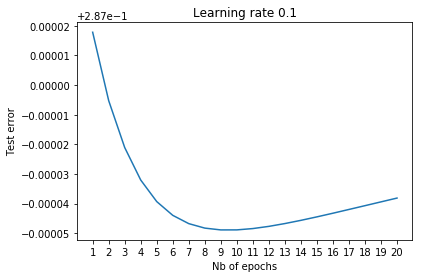

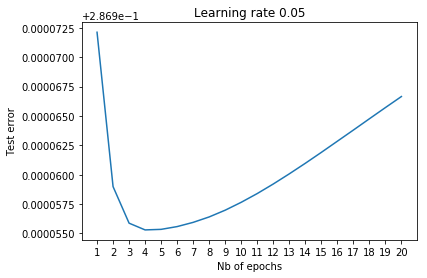

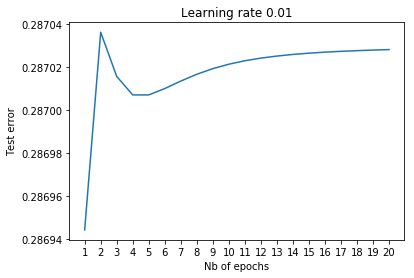

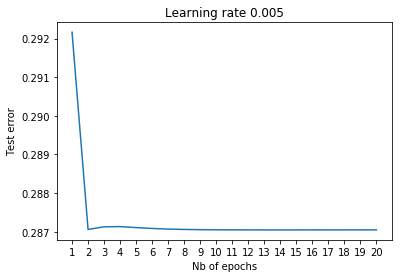

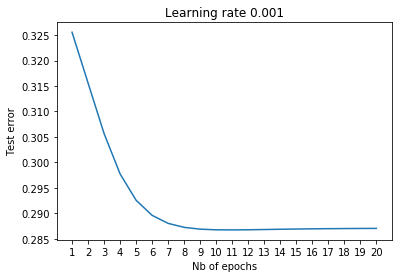

In [75]:
for res,lr in zip(lr_results, learning_rates):
    plt.figure()
    plt.plot(range(1,len(res[0])+1),res[0])
    plt.xlabel("Nb of epochs")
    plt.ylabel("Test error")
    plt.xticks(range(1,len(res[0])+1))
    plt.title("Learning rate "+str(lr))
plt.savefig("figures/nn_features_lr_results.png")
plt.show()

In [66]:
with open("results/nn_features_lr_results.pkl","wb") as f:
    pickle.dump(lr_results, f)

### Batch size

In [66]:
batch_sizes = [ 2**n for n in range(4,9) ]

bsize_results = []
for bsize in tqdm_notebook(batch_sizes):
    print("BATCH SIZE", bsize)
    print("-"*15)
    model = nn.Sequential(nn.Linear(6,12), nn.Linear(12,1), nn.Sigmoid())
    arr = train_model(model, nb_epochs=20, mini_batch_size=bsize)
    bsize_results.append(arr)
    with open("models/features_nn_model_bsize_"+str(bsize)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

BATCH SIZE 16
---------------



  Epoch   1 : loss = 5760.57744921 | training error = 0.27800179957172516 | validation error = 0.29152678742619037


  Epoch   2 : loss = 5752.35026866 | training error = 0.27799051674428177 | validation error = 0.29150730489848614


  Epoch   3 : loss = 5752.30463484 | training error = 0.2779885613318492 | validation error = 0.291505532914225


  Epoch   4 : loss = 5752.29601284 | training error = 0.27798794588885134 | validation error = 0.2915049002462433


  Epoch   5 : loss = 5752.29308744 | training error = 0.2779877121926339 | validation error = 0.2915045657502088


  Epoch   6 : loss = 5752.29191498 | training error = 0.27798761683339696 | validation error = 0.29150439403431333


  Epoch   7 : loss = 5752.29141619 | training error = 0.2779875645180082 | validation error = 0.2915042894589079


  Epoch   8 : loss = 5752.29120404 | training error = 0.27798754719785324 | validation error = 0.291504243744541


  Epoch   9 : loss = 5752.29111018 | training error = 0.27798753383900154 | validation error = 0.29150421723847353


KeyboardInterrupt: 

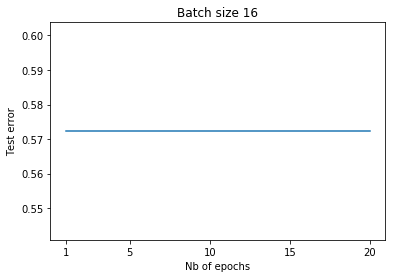

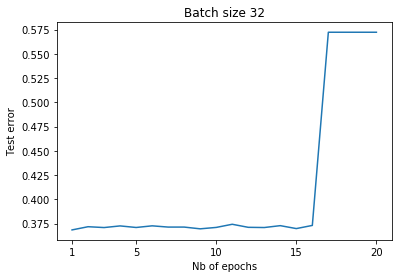

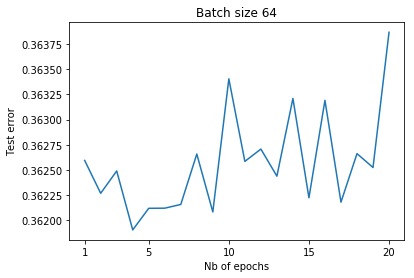

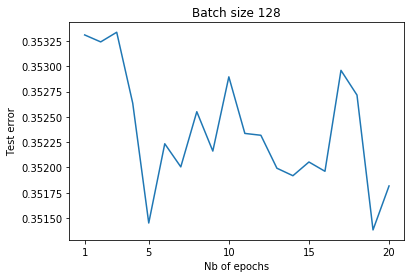

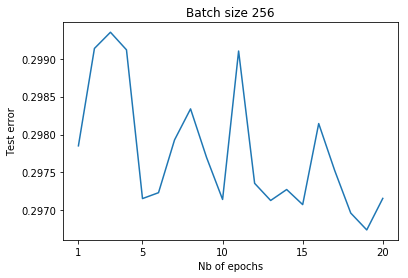

In [62]:
for res,bsize in zip(bsize_results,batch_sizes):
    plt.figure()
    plt.plot(range(1,len(res[0])+1),res[0])
    plt.xlabel("Nb of epochs")
    plt.ylabel("Test error")
    plt.xticks([1]+list(range(5,len(res[0])+1,5)))
    plt.title("Batch size "+str(bsize))
plt.savefig("figures/nn_features_bsize_results.png")
plt.show()

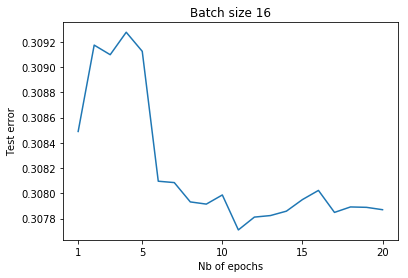

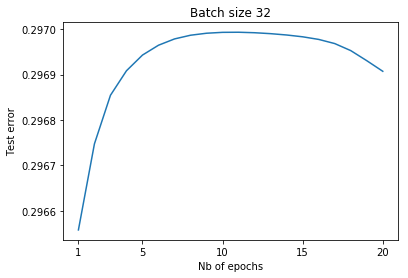

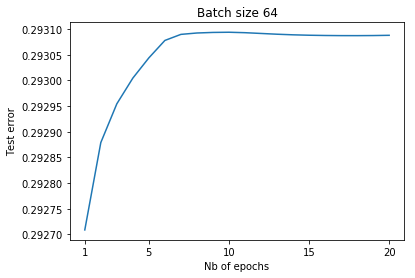

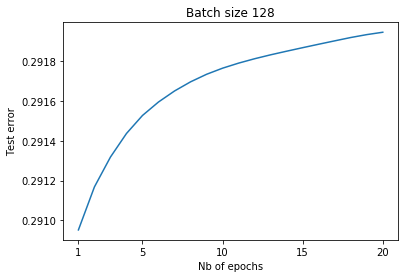

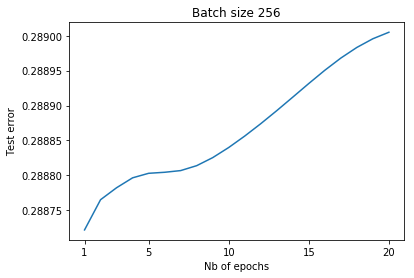

In [60]:
for res,bsize in zip(bsize_results,batch_sizes):
    plt.figure()
    plt.plot(range(1,len(res[0])+1),res[0])
    plt.xlabel("Nb of epochs")
    plt.ylabel("Test error")
    plt.xticks([1]+list(range(5,len(res[0])+1,5)))
    plt.title("Batch size "+str(bsize))
plt.savefig("figures/nn_features_bsize_results.png")
plt.show()

In [66]:
with open("results/nn_features_bsize_results.pkl","wb") as f:
    pickle.dump(bsize_results, f)

In [78]:
#model_lr_reducer = nn.Sequential(nn.Linear(6,20), nn.BatchNorm1d(20), nn.Linear(20,10), nn.BatchNorm1d(10), nn.Linear(10,1), nn.Sigmoid())
model_lr_reducer = nn.Sequential(nn.Linear(6,12), nn.Linear(12,1), nn.Sigmoid())
reducer_res = train_model(model_lr_reducer, nb_epochs=100, mini_batch_size=16, learning_rate=0.05)

  Epoch   1 : loss = 5749.05225977 | training error = 0.2738321026855732 | validation error = 0.2873171788504929


  Epoch   2 : loss = 5722.70351575 | training error = 0.2736960146449279 | validation error = 0.2871480378758179


  Epoch   3 : loss = 5721.32229267 | training error = 0.2736439320186805 | validation error = 0.28708496812355816


  Epoch   4 : loss = 5720.55391020 | training error = 0.27362009256613795 | validation error = 0.28705717622754373


  Epoch   5 : loss = 5720.07555303 | training error = 0.2736080489953071 | validation error = 0.2870438185525265


  Epoch   6 : loss = 5719.74953355 | training error = 0.27360167722321765 | validation error = 0.2870372008005388


  Epoch   7 : loss = 5719.51111254 | training error = 0.2735983082739238 | validation error = 0.28703401726926625


  Epoch   8 : loss = 5719.32724272 | training error = 0.2735966240147394 | validation error = 0.2870326777298227


  Epoch   9 : loss = 5719.17975443 | training error = 0.2735959342583396 | validation error = 0.2870323920125942


  Epoch  10 : loss = 5719.05805430 | training error = 0.27359582915534564 | validation error = 0.2870327155662708


  Epoch  11 : loss = 5718.95547003 | training error = 0.27359606907907186 | validation error = 0.287033399406207


  Epoch  12 : loss = 5718.86768873 | training error = 0.2735964962086562 | validation error = 0.2870343082007764


  Epoch  13 : loss = 5718.79171131 | training error = 0.27359701445376633 | validation error = 0.2870353175473586


  Epoch  14 : loss = 5718.72537087 | training error = 0.2735975573776947 | validation error = 0.2870363926011143


  Epoch  15 : loss = 5718.66707472 | training error = 0.2735980803887755 | validation error = 0.2870374939713918


  Epoch  16 : loss = 5718.61557808 | training error = 0.27359855800421096 | validation error = 0.28703857958484347


  Epoch  17 : loss = 5715.48171573 | training error = 0.27351108796936685 | validation error = 0.2870145624372396


  Epoch  18 : loss = 5715.30710193 | training error = 0.27350974935688077 | validation error = 0.2870389769707275


  Epoch  19 : loss = 5715.28303306 | training error = 0.2735094027636241 | validation error = 0.28704591661050616


  Epoch  20 : loss = 5715.27623733 | training error = 0.2735092799680584 | validation error = 0.287047853259868


  Epoch  21 : loss = 5715.27350712 | training error = 0.273509227962799 | validation error = 0.2870483790619945


  Epoch  22 : loss = 5715.27215594 | training error = 0.27350920231149717 | validation error = 0.28704850657656905


  Epoch  23 : loss = 5715.27136512 | training error = 0.2735091922053027 | validation error = 0.28704851687535005


  Epoch  24 : loss = 5715.27086000 | training error = 0.2735091834920151 | validation error = 0.2870485202145531


  Epoch  25 : loss = 5715.27051188 | training error = 0.27350918212792097 | validation error = 0.28704851911631296


  Epoch  26 : loss = 5715.27026222 | training error = 0.27350918030526195 | validation error = 0.2870485274808899


  Epoch  27 : loss = 5715.27006464 | training error = 0.27350918212475045 | validation error = 0.2870485174181519


  Epoch  28 : loss = 5715.26990227 | training error = 0.273509181988449 | validation error = 0.28704851356300215


  Epoch  29 : loss = 5714.78154455 | training error = 0.27350257017469237 | validation error = 0.2870649673145265


  Epoch  30 : loss = 5714.76729031 | training error = 0.27350257318116644 | validation error = 0.2870664378340414


  Epoch  31 : loss = 5714.76707093 | training error = 0.27350256300884535 | validation error = 0.28706768298251106


  Epoch  32 : loss = 5714.76667114 | training error = 0.273502553428724 | validation error = 0.28706877598661346


  Epoch  33 : loss = 5714.76630461 | training error = 0.2735025453078554 | validation error = 0.2870697343214345


  Epoch  34 : loss = 5714.76600202 | training error = 0.27350253882672143 | validation error = 0.28707057632013105


  Epoch  35 : loss = 5714.76576732 | training error = 0.2735025337142076 | validation error = 0.28707131706430744


  Epoch  36 : loss = 5714.76556697 | training error = 0.27350252942939857 | validation error = 0.2870719628654664


  Epoch  37 : loss = 5714.76540721 | training error = 0.27350252668946484 | validation error = 0.28707252764042274


  Epoch  38 : loss = 5714.76528263 | training error = 0.2735025234521591 | validation error = 0.28707301814673397


  Epoch  39 : loss = 5714.76518072 | training error = 0.27350252148027515 | validation error = 0.28707345128914985


  Epoch  40 : loss = 5714.69871692 | training error = 0.2735019272379451 | validation error = 0.2870772783326725


  Epoch  41 : loss = 5714.68519975 | training error = 0.2735017604408784 | validation error = 0.2870788475889905


  Epoch  42 : loss = 5714.68071569 | training error = 0.27350169109654016 | validation error = 0.2870794419838512


  Epoch  43 : loss = 5714.67856205 | training error = 0.2735016527232432 | validation error = 0.2870796483261767


  Epoch  44 : loss = 5714.67729141 | training error = 0.27350162910053955 | validation error = 0.28707970276243155


  Epoch  45 : loss = 5714.67647888 | training error = 0.2735016131905294 | validation error = 0.2870797097311894


  Epoch  46 : loss = 5714.67593305 | training error = 0.2735016020462398 | validation error = 0.287079710125958


  Epoch  47 : loss = 5714.67554330 | training error = 0.27350159443176564 | validation error = 0.2870797130171679


  Epoch  48 : loss = 5714.67527141 | training error = 0.2735015889177042 | validation error = 0.2870797238238919


  Epoch  49 : loss = 5714.67507228 | training error = 0.273501584854137 | validation error = 0.28707973868048337


  Epoch  50 : loss = 5714.67492748 | training error = 0.27350158183535617 | validation error = 0.2870797595866642


  Epoch  51 : loss = 5714.66414476 | training error = 0.27350157463615316 | validation error = 0.28708059663913776


  Epoch  52 : loss = 5714.66386955 | training error = 0.27350156883562404 | validation error = 0.28708141758947286


  Epoch  53 : loss = 5714.66365432 | training error = 0.27350156437970125 | validation error = 0.287082223850678


  Epoch  54 : loss = 5714.66349144 | training error = 0.2735015611125796 | validation error = 0.28708301628562555


  Epoch  55 : loss = 5714.66337298 | training error = 0.27350155868882337 | validation error = 0.2870837956461914


  Epoch  56 : loss = 5714.66329096 | training error = 0.27350155724366004 | validation error = 0.28708456335267235


  Epoch  57 : loss = 5714.66324571 | training error = 0.2735015567347723 | validation error = 0.287085319735852


  Epoch  58 : loss = 5714.66323391 | training error = 0.27350155684776417 | validation error = 0.2870860661904239


  Epoch  59 : loss = 5714.66325023 | training error = 0.2735015576278314 | validation error = 0.2870868031480177


  Epoch  60 : loss = 5714.66329479 | training error = 0.27350155891482936 | validation error = 0.28708753204341253


  Epoch  61 : loss = 5714.66336302 | training error = 0.27350156091546424 | validation error = 0.2870882517841296


  Epoch  62 : loss = 5714.66180066 | training error = 0.2735015614268098 | validation error = 0.2870883332982073


  Epoch  63 : loss = 5714.66182205 | training error = 0.27350156191859354 | validation error = 0.28708841456287454


  Epoch  64 : loss = 5714.66184694 | training error = 0.27350156248603713 | validation error = 0.2870884952962664


  Epoch  65 : loss = 5714.66187648 | training error = 0.27350156312412477 | validation error = 0.28708857575695435


  Epoch  66 : loss = 5714.66190072 | training error = 0.27350156389347796 | validation error = 0.28708865646566006


  Epoch  67 : loss = 5714.66192999 | training error = 0.2735015647513121 | validation error = 0.2870887372274015


  Epoch  68 : loss = 5714.66195848 | training error = 0.27350156522041896 | validation error = 0.2870888170310845


  Epoch  69 : loss = 5714.66198879 | training error = 0.2735015663677891 | validation error = 0.287088897376143


  Epoch  70 : loss = 5714.66202548 | training error = 0.2735015669773963 | validation error = 0.2870889770061382


  Epoch  71 : loss = 5714.66206414 | training error = 0.273501567960217 | validation error = 0.2870890567690972


  Epoch  72 : loss = 5714.66209869 | training error = 0.2735015689050028 | validation error = 0.28708913564073074


  Epoch  73 : loss = 5714.66194307 | training error = 0.2735015689984512 | validation error = 0.28708914010109743


  Epoch  74 : loss = 5714.66194353 | training error = 0.27350156889330546 | validation error = 0.28708914443493433


  Epoch  75 : loss = 5714.66194926 | training error = 0.2735015690227937 | validation error = 0.2870891489929401


  Epoch  76 : loss = 5714.66195285 | training error = 0.2735015689541615 | validation error = 0.28708915340236074


  Epoch  77 : loss = 5714.66195363 | training error = 0.27350156918854335 | validation error = 0.28708915807530727


  Epoch  78 : loss = 5714.66195840 | training error = 0.2735015692975682 | validation error = 0.2870891627537318


  Epoch  79 : loss = 5714.66196001 | training error = 0.27350156933686776 | validation error = 0.2870891672668355


  Epoch  80 : loss = 5714.66196625 | training error = 0.27350156953609084 | validation error = 0.2870891718225653


  Epoch  81 : loss = 5714.66197009 | training error = 0.27350156947098253 | validation error = 0.28708917617181395


  Epoch  82 : loss = 5714.66197419 | training error = 0.2735015696008456 | validation error = 0.28708918073132605


  Epoch  83 : loss = 5714.66197411 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  84 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  85 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  86 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  87 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  88 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  89 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  90 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  91 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  92 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  93 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  94 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  95 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  96 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  97 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  98 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch  99 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


  Epoch 100 : loss = 5714.66196557 | training error = 0.273501569552715 | validation error = 0.28708918519477167


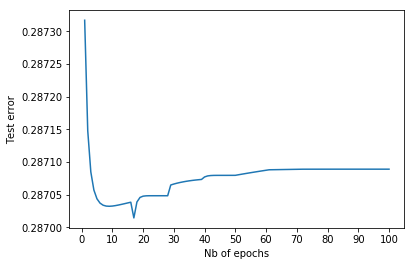

In [79]:
plt.figure()
plt.plot(range(1,len(reducer_res[0])+1),reducer_res[0])
plt.xlabel("Nb of epochs")
plt.ylabel("Test error")
plt.xticks(range(0,len(reducer_res[0])+1,10))
plt.show()

In [80]:
reducer_res[1]

0.2870145624372396